# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

## Important Dates

- Homework release: Fri 18 Nov 2022
- **Homework due**: Fri 02 Dec 2022, 23:59
- Grade release: Mon 12 Dec 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at [FC Tokyo, a J1 League Japanese professional football club based in Chōfu, Tokyo](https://en.wikipedia.org/wiki/FC_Tokyo). The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

Your manager, Mr. Naoki Ogane, has noticed that an unusually high number of players in your team have birthdays in either April or May, so he asked you to investigate this further -- is this just a coincidence, or are players born in April or May simply better?

## Data

To answer Mr. Ogane's questions, you will use data from Wikipedia biographies. This is a subset of the Pantheon dataset (1). For tasks 1 to 4, you will use the file `japanese_athletes.csv.gz`. For task 5, you will use the file `all_entities.csv.gz`. Both datasets are`.csv` files with the same columns:

- `id`: a unique identifier per individual.
- `name`: name of the individual.
- `occupation`: the occupation of the individual (for `japanese_athletes.csv.gz`, these are all sports-related).
- `gender`: gender of the athlete.
- `alive`: flag indicating if the athlete was alive in 2020 when the dataset was collected.
- `bplace_country`: the country where the athlete was born  (for `japanese_athletes.csv.gz`, the value here is always 'Japan').
- `birthdate`: the date when the athlete was born.
- `birthyear`: the year when the athlete was born.
- `pageviews`: number of pageviews received by the athlete's page across Wikipedia language editions.

(1) Yu, A. Z., et al. (2016). Pantheon 1.0, a manually verified dataset of globally famous biographies. Scientific Data 2:150075. doi: 10.1038/sdata.2015.75

## Task 1 — 20 pts

As a good data scientist, you first load the data and perform some small sanity checks on it.

**1.1** Load the dataset containing data about Japanese athletes into memory using pandas. First, load the data directly from the compressed file. Then, print the first few lines of the dataset.

**1.2** Find the different occupations in the data and how many individuals belong to each occupation.

**1.3** Calculate the percentage of individuals who remain alive in the data.

**1.4** Plot the distribution of birth years in the dataset. In other words, what fraction of individuals are born each year? (Note that the data contains individuals born only after the year 1900).

**1.5** Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews. Here you should use a linear scale for both the x-axis and the y-axis.

**1.6** **Discuss:** why is it hard to visualize the distribution in the above ECDF plot?

**1.7** Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.

**1.8** **Discuss:** Visually, does it look like the distribution is a power law?

**1.9** Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.

**1.10** **Discuss:** What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?

In [ ]:
import pandas as pd
import numpy as np

# 1.1
japanese_athletes = pd.read_csv('./data/japanese_athletes.csv.gz', parse_dates=['birthdate'])
japanese_athletes.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0


In [ ]:
# 1.2
japanese_athletes.groupby("occupation").size()

occupation
ATHLETE                40
BASKETBALL PLAYER       2
BOXER                   2
CYCLIST                 4
GYMNAST                15
SKATER                 21
SKIER                  11
SOCCER PLAYER        3929
SWIMMER                21
TENNIS PLAYER          18
WRESTLER               60
dtype: int64

In [ ]:
# 1.3
print(
    "the percentage of individuals who remain alive in the data: {:.2f}%".format(
        japanese_athletes.alive.sum() / len(japanese_athletes) * 100
    )
)

the percentage of individuals who remain alive in the data: 97.19%


Text(0.5, 1.0, 'Histogram of Birth Year')

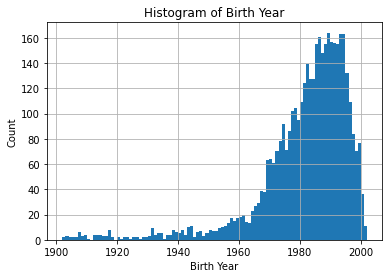

In [ ]:
# 1.4
import matplotlib.pyplot as plt

japanese_athletes.birthyear.hist(bins=100)
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.title("Histogram of Birth Year")

Text(0.5, 1.0, 'ECDF of Pageviews')

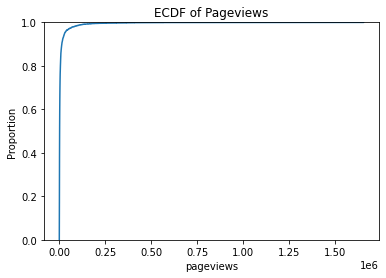

In [ ]:
# 1.5
import seaborn as sns

sns.ecdfplot(data=japanese_athletes, x="pageviews")
plt.title("ECDF of Pageviews")

**1.6**: The CDF plot is hard to visualize because the pageviews are highly skewed. The range of pageviews is large, but the majority of the individuals have a small number of pageviews. So the CDF curve approaches 1 very quickly.

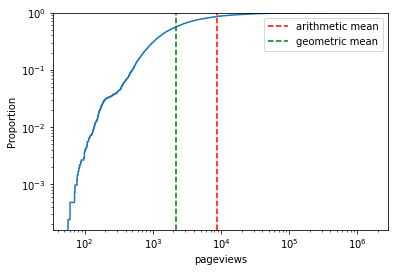

In [ ]:
# 1.7
from math import log
from scipy.stats import gmean

sns.ecdfplot(data=japanese_athletes, x="pageviews", log_scale=(True, True))
mean_line = plt.axvline(japanese_athletes.pageviews.mean(), color="red", linestyle="--")
geo_mean_line = plt.axvline(
    gmean(japanese_athletes.pageviews), color="green", linestyle="--"
)
plt.legend([mean_line, geo_mean_line], ["arithmetic mean", "geometric mean"])

**1.8**: It does not look like a power law, since power law's CDF is a straight line when using a log scale for x and y axes (linear relationship in log-log scale).

In [ ]:
# 1.9
import numpy.random as random


def simple_bootstrap(f, val):
    bs = random.choice(val, size=(len(val), 10000), replace=True)
    val_ = f(bs)
    lower, upper = np.quantile(val_, q=[0.025, 0.975])
    return val_.mean(), lower, upper


print(">> The geometric mean of pageviews:")
est, lowci, hici = simple_bootstrap(
    f=lambda x: gmean(x, axis=0), val=japanese_athletes.pageviews.values
)
print("μ = {} 95%CI [{}, {}]".format(est, lowci, hici))

print(">> The arithmetic mean of pageviews:")
est, lowci, hici = simple_bootstrap(
    f=lambda x: np.mean(x, axis=0), val=japanese_athletes.pageviews.values
)
print("μ = {} 95%CI [{}, {}]".format(est, lowci, hici))

>> The geometric mean of pageviews:
μ = 2185.3430447259507 95%CI [2094.3159366783784, 2278.177636393368]
>> The arithmetic mean of pageviews:
μ = 8692.874275090953 95%CI [7551.519742905652, 10086.785265583314]


**1.10**: Geometric mean is less sensitive to outliers than arithmetic mean, so it can better describe heavy-tailed distributions. We can also see from the 95 CI that geometric mean is more compact.


## Task 2 — 20 pts

Next, investigate the question posed by Mr. Ogane. *Why do so many Tokyo FC players have birthdays in the same month?* 
Here you will not look specifically at Tokyo FC players, but more generally at the birthdays of the athletes in the dataset you have explored in Task 1

**2.1** Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.

**2.2** Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.

**2.3** **Discuss:** what is different between the distributions you ploted in **2.1** and **2.2**

After discussing with your colleagues at work, a theory comes to your mind: school in Japan starts in April. Children who were born between April 1 and March 31 of the following year are placed within the same grade. Therefore, you suspect that the observed pattern may have something to do with when students start school.

**2.4** Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:

- For students born in April, how many months older are they than the average student in their grade?
- For students born in March, how many months younger are they than the average student in their grade?

**2.5** **Discuss:** Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?

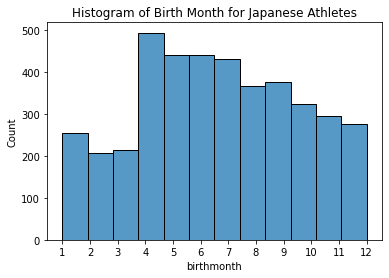

In [ ]:
# 2.1

japanese_athletes["birthmonth"] = japanese_athletes.birthdate.dt.month
sns.histplot(data=japanese_athletes, x="birthmonth", bins=12)
plt.title("Histogram of Birth Month for Japanese Athletes")
plt.xticks(np.arange(1,13))
plt.show()

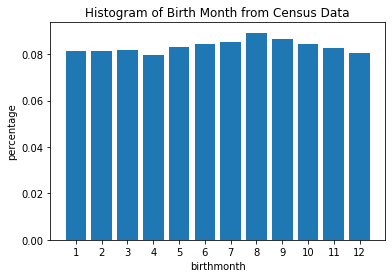

In [ ]:
# 2.2

# This is given data
birth_per_month = np.array([
0.08118368,0.08148065, 0.08182577, 0.07982728, 0.08301363,
0.08422556, 0.08518067, 0.08925791, 0.08635247, 0.08460279,
0.08258825, 0.08046134
])

# plot the histogram using birth_per_month
plt.bar(np.arange(1, 13), birth_per_month)
plt.xlabel("birthmonth")
plt.ylabel("percentage")
plt.title("Histogram of Birth Month from Census Data")
plt.xticks(np.arange(1,13))
plt.show()

**2.3**: In plot **2.2**, the distribution is close to uniform, while in plot **2.1**, the distribution is non-uniform and has a peak in April. It also has a decreasing trend after April.

In [ ]:
# 2.4

# school in Japan starts in April
diff = 0
for i in range(12):
    # 0 month older than April (index 3)
    # 1 month older than May (index 4)
    # ...
    diff += i * birth_per_month[(i + 3) % 12]

print(
    f"For students born in April, they are {diff:.2f} month older than the average student in their grade."
)

diff = 0
for i in range(12):
    # 0 month younger than March (index 2)
    # 1 month younger than Feburary (index 1)
    # ...
    diff += i * birth_per_month[(2 - i) % 12]

print(
    f"For students born in March, they are {diff:.2f} month younger than the average student in their grade."
)

For students born in April, they are 5.47 month older than the average student in their grade.
For students born in March, they are 5.53 month younger than the average student in their grade.


**2.5**: Students born in April are older than those born in March, and thus their bodies are more mature. This may give them an advantage in sports, and thus they may have a higher chance of becoming professional athletes.

## Task 3 — 20 pts

You report your findings to Mr. Ogane, who receives them with great interest. He asks you: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* (Here, “Wikipedia-famous” refers to those individuals notable enough to have made it into English Wikipedia.)

**3.1** Create a new column in the dataframe called `date_diff` representing the distance between the athlete's birthdate and the cutoff date of his school class. 
- For individuals born in April, May, June, July, August, and September: The distance should be positive and represent the number of days between the birthdate and the previous April 1. For example, if someone is born on April 1, the distance is 0, if someone is born on April 10, the distance is 9, etc.
- For individuals born in October, November, December, January, February, and March: The distance should be negative and represent the number of days between the following April 1 and the birthdate. For example, if someone is born on March 31, the distance is -1; if someone is born on March 27, the distance is -5.
- Print the `date_diff` for the athletes with ids:  `20639249` and `58982155`.

**3.2** Create three numpy arrays `x`, `y`, and `ind` all of size 360. 
- `x` should contain the integers between -180 and 179 (-180 and 179 inclusive). 
- `y` should contain the percentage of athletes born with a `date_diff` equal to the corresponding value of `x`.
- `ind` should contain 0 if `x` is smaller than zero and 1 if `x` is bigger or equal to zero.


**3.3** Estimate the following linear regression: `y ~ x + ind` using `statsmodels`. Report the summary of the model.

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression?

**3.5** Use the model parameters to estimate the percentage of athletes born on March 31st, i.e., use the intercept ($\beta_0$) and the coefficient associated with `x` ($\beta_1$) and calculate: $\beta_0 - 1 * \beta_1$ (recall that $x$ equals -1 in March 31st).

**3.6** Use the model parameters to estimate the percentage of athletes born on April 1st.

**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why.

---

**Comment**: Note that in **3.2**, the size of the array created is slightly smaller than the number of days in the year. This is for simplicity's sake.

In [ ]:
# 3.1

from pandas import Timestamp


def calc_date_diff(date: Timestamp):
    if date.month >= 4 and date.month <= 9:
        # the number of days between the birthdate and the previous April 1
        return (date - Timestamp(year=date.year, month=4, day=1)).days
    # the number of days between the following April 1 and the birthdate.
    elif date.month <= 3:
        return (date - Timestamp(year=date.year, month=4, day=1)).days
    else:
        return (date - Timestamp(year=date.year + 1, month=4, day=1)).days


# Tests
assert calc_date_diff(Timestamp("2022-04-01")) == 0
assert calc_date_diff(Timestamp("2022-04-10")) == 9
assert calc_date_diff(Timestamp("2022-03-31")) == -1
assert calc_date_diff(Timestamp("2022-03-27")) == -5
assert calc_date_diff(Timestamp("2022-10-01")) == -182
assert calc_date_diff(Timestamp("2022-09-30")) == 182


japanese_athletes["date_diff"] = japanese_athletes.birthdate.apply(calc_date_diff)
japanese_athletes.set_index("id", inplace=True)
print(
    "date_diff for athelete 20639249: {}".format(
        japanese_athletes.loc[20639249]["date_diff"]
    )
)
print(
    "date_diff for athelete 58982155: {}".format(
        japanese_athletes.loc[58982155]["date_diff"]
    )
)

date_diff for athelete 20639249: -24
date_diff for athelete 58982155: 6


In [ ]:
# 3.2
x = np.arange(-180, 180)
y = japanese_athletes.groupby("date_diff").size() / japanese_athletes.size
# y has -183 to 182, we only keep -180 to 179
y = y.iloc[3:-3].values
ind = (x >= 0).astype(int)
assert x.shape == (360,)
assert y.shape == (360,)
assert ind.shape == (360,)

print(x[:5])
print(y[:5])
print(ind[:5])
print()
print(x[-1:-6:-1])
print(y[-1:-6:-1])
print(ind[-1:-6:-1])

[-180 -179 -178 -177 -176]
[0.00043658 0.00038807 0.00041232 0.0003153  0.00024254]
[0 0 0 0 0]

[179 178 177 176 175]
[0.00019403 0.00016978 0.00038807 0.00038807 0.00038807]
[1 1 1 1 1]


In [ ]:
# 3.3
import statsmodels.formula.api as smf

df = pd.DataFrame({"x": x, "y": y, "ind": ind})
mod = smf.ols(formula="y ~ x + C(ind)", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.87e-40
Time:                        16:59:36   Log-Likelihood:                 2848.1
No. Observations:                 360   AIC:                            -5690.
Df Residuals:                     357   BIC:                            -5679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002   1.05e-05     14.696      

**3.4**: The coefficient associated with the dummy variable `ind` is possitive, which means that the exact mean of the percentage of athletes with `date_diff >= 0` is higher than the percentage of athletes with `date_diff < 0`. 


In [ ]:
# 3.5
beta_0 = res.params["Intercept"]
beta_1 = res.params["x"]
print(f"The estimated percentage of athletes born on March 31st is {beta_0 - 1 * beta_1}")

The estimated percentage of athletes born on March 31st is 0.00015536189430982448


In [ ]:
# 3.6
beta_2 = res.params["C(ind)[T.1]"]
print(f"The estimated percentage of athletes born on April 1st is {beta_0 + beta_2}")

The estimated percentage of athletes born on April 1st is 0.00039264791516008745


**3.7**: 
Not all confounders are eliminated. There might be a confounder that simultaneously affects the birthdate of children and the children becoming well-known athletes. It can be that the parents that tend to make their children professional athletes want to have their children in April or May so that they hope their children can be more mature than other children in the same grade, causing the children to be athelete in April or May more than other months.

## Task 4 — 20 pts

You return to Mr. Ogane with your findings, which he again receives with great interest. The sharp manager, however, asks a question that ignites your curiosity: *are athletes that are born right after the school cut-off date (i.e., in April or May) simply better?**

To understand if that is the case, you come up with a plan: the number of pageviews received by a Wikipedia page is a good way to differentiate between mildly famous athletes and truly famous ones. Thus you can do a matched analysis comparing athletes born in February or March (right before the cut-off) with athletes born in April or May (right after the cut-off); you should discard all athletes that were not born in one of these four months.

To make matched athletes even more comparable, you will also only consider pairs of athletes that:
1. were born in the same year; 
2. have the same gender; and
3. have the same occupation.

Matching should be done 1-to-1; i.e., each athlete born in February/March should be matched to one and only one athlete born in April/May (there will naturally be some athletes left unmatched).

**4.1** Obtain the matched data described in the text above. Report the number of matched pairs and the number of discarded athletes. Your resulting dataframe should contain one row per athlete and an indicator variable `is_after`, which equals 1 when the athlete was born in April or May and 0 otherwise. Note that here you are doing exact matching, and not propensity score matching!

**4.2** The number of pageviews is heavy-tailed, as we have seen in Task 1. Create a new column in your matched dataframe containing the natural logarithm of the number of pageviews.

**4.3** Assuming that whether the athlete is born in the two months right before the cutoff (February and March) or the two months right after (April and May) is assigned at random, use a linear regression to estimate the effect of being born after rather than before the cutoff date in the number of pageviews athletes receive. Use the log-transformed value you calculated in **4.2** as the outcome of your model (i.e., the $y$ of the regression). Report the summary of your model.


**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.

---


In [ ]:
# 4.1

# delete all athletes that are not born in Month 2,3,4,5
japanese_athletes_before_match = japanese_athletes[japanese_athletes['birthmonth'].isin([2,3,4,5])].copy(deep=True)
japanese_athletes_before_match['is_after'] = japanese_athletes_before_match['birthmonth'].apply(lambda x:0 if x <= 3 else 1)

# match birthyear, gender, occupation between athletes
japanese_athletes_before_match_group = japanese_athletes_before_match.groupby(['birthyear', 'gender', 'occupation'], as_index = False)
japanese_athletes_after_match = pd.DataFrame(columns = japanese_athletes_before_match.columns)
for i, (idx, controlled_group) in enumerate(japanese_athletes_before_match_group):
    N = controlled_group.shape[0]
    # One-element group cannot create match
    if(N == 1):
        continue
    group_diff = controlled_group['is_after'].unique()
    # group that does not have treat/control split should be discarded
    if(len(group_diff) == 1):
        continue
    # group by treat/control where treat is after 0401
    treat_control = controlled_group.groupby(['is_after'], as_index = False)
    # First 1-to-1 match in two groups and discrad the left data
    # Pick k rows from each group where k=min(treat.size, control.size)
    pick_size = np.min(treat_control.size()['size'])
    picked_rows = treat_control.nth(list(range(pick_size)))
    japanese_athletes_after_match = pd.concat([japanese_athletes_after_match, picked_rows])

    
assert japanese_athletes_after_match.shape[0] % 2 == 0
print('Number of matched pairs: ', japanese_athletes_after_match.shape[0] // 2)
japanese_athletes_after_match.head()

Number of matched pairs:  358


,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,birthmonth,date_diff,is_after
25864203,Yasuo Haruyama,SOCCER PLAYER,M,False,Japan,1906-04-04,1906.0,935.0,4,3,1
20305413,Shigemaru Takenokoshi,SOCCER PLAYER,M,False,Japan,1906-02-15,1906.0,1774.0,2,-45,0
20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934.0,1047.0,3,-29,0
25864538,Kenzo Ohashi,SOCCER PLAYER,M,False,Japan,1934-04-21,1934.0,758.0,4,20,1
19134567,Masahiro Hamazaki,SOCCER PLAYER,M,False,Japan,1940-03-14,1940.0,983.0,3,-18,0


In [ ]:
# 4.2

japanese_athletes_after_match['log_pageviews'] = np.log(japanese_athletes_after_match['pageviews'])
japanese_athletes_after_match.head()

,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,birthmonth,date_diff,is_after,log_pageviews
25864203,Yasuo Haruyama,SOCCER PLAYER,M,False,Japan,1906-04-04,1906.0,935.0,4,3,1,6.840547
20305413,Shigemaru Takenokoshi,SOCCER PLAYER,M,False,Japan,1906-02-15,1906.0,1774.0,2,-45,0,7.480992
20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934.0,1047.0,3,-29,0,6.953684
25864538,Kenzo Ohashi,SOCCER PLAYER,M,False,Japan,1934-04-21,1934.0,758.0,4,20,1,6.630683
19134567,Masahiro Hamazaki,SOCCER PLAYER,M,False,Japan,1940-03-14,1940.0,983.0,3,-18,0,6.890609


In [ ]:
# 4.3 

mod = smf.ols(formula="log_pageviews ~ C(is_after)", data=japanese_athletes_after_match)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_pageviews   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05839
Date:                Fri, 02 Dec 2022   Prob (F-statistic):              0.809
Time:                        16:59:37   Log-Likelihood:                -1258.2
No. Observations:                 716   AIC:                             2520.
Df Residuals:                     714   BIC:                             2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.8307      0.074  

**4.4**: 
The coefficient of `is_after` is 0.0254 and this is for log pageviews, which means that the average pageviews of athletes born after April.1 is 2.5% (1.0254 times) larger than that of athlete born before the date, since the number is close to 0 and the target is after logarithm, indicating a multiplicative relationship between the change on input variables and the output.

**4.5**: 
Causal Diagram:

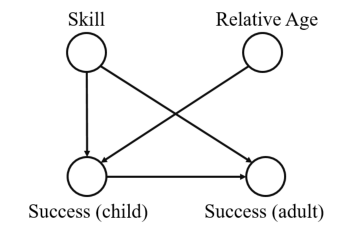

In [ ]:
# cannot show image on github with html style image insert
from PIL import Image
img = Image.open('img/diagram.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Explanation:

1. Skill->Success (Child)/(Adult): an individual's innate talent towards a sport can influence the efficiency and speed of mastering a sport, which will contribute to the individual's success as an athlete if the one is born with strong skills towards a sport.
2. Relative Age->Success (Child): As shown in task 4.4, two groups with all matched individuals still have different group means, indicating that the birthdate is affecting childhood success. We assume that here since innate skills are hard to quantify and are totally determined by genetic-related variables, the distribution of innate skills over time should be uniform. However, it cannot directly affect adulthood success since when people grow up, the difference between peers is very small. (e.g., an 18.5-year-old person is not very different from an 18-year-old one, but a 6.5-year-old child can be stronger than a 6-year-old one.)
3. Success (Child)->Success (Adult): clearly, the success of an individual as an athlete as a child can influence his/her choice towards continuing an athlete career and whether to be more devoted, thus contributing to the individual's adulthood success as an athlete.

Discuss:

In our causal diagram when the success of an individual as an athlete as a child is fixed, the only variable that influences the adulthood success is innate skills, which cannot be measured unless two persons are twins (same genes!). Hence, we cannot determine who will be more successful.

## Task 5 — 20 pts

Your findings in Task 4 provide important information for Tokyo FC to scout for young athletes. However, Mr. Ogane points out that other countries have messier cut-off dates for school (e.g., in the U.S., it varies widely by state), and thus the results may be less applicable to other countries.

While you could investigate specific cut-off dates per country, you decide to first use your machine learning skills to get a sense of how promising your efforts might turn out to be. This is made easy as you find an extended version of the dataset you've been working on so far, which contains data about all Wikipedia biographies all around the world

**5.1**Load the dataset containing data about Wikipedia-famous individuals into memory using pandas. You should load the data directly from the compressed file. Then, print the first few lines of the dataset.


**5.2** Create two columns in this dataframe:
- `is_athlete` an indicator variable which equals 1 if the occupation of an individual is related to a sport (you are provided with a list below) and 0 otherwise.
- `dayofyear` an integer between 1 and 366 indicating on which day of the year the individual was born.

**5.3** For each country:
- Create a training set with 80% of the individuals and a test set with the remaining 20%;
- Train a random forest model (using `sklearn`, you can use the default parameters) to predict whether an individual is an athlete or not based on: 1) the day of the year they were born `dayofyear`; 2) the year they were born (e.g., 1964, year should be a numerical variable) and 3) their gender.
- report the precision of your classifier for each country.

**5.4** Estimate the percentage of `athlete` individuals per country (simply by counting in the data).

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here?

**5.6** Repeat the procedure done in **5.3**, but now calculate the metric you proposed in **5.5**.

**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify.

In [ ]:
athlete_categories = {
    'ATHLETE',
    'BASKETBALL PLAYER',
    'BOXER',
    'CYCLIST',
    'GYMNAST',
    'HANDBALL PLAYER',
    'HOCKEY PLAYER',
    'SKATER',
    'SKIER',
    'TENNIS PLAYER',
    'SOCCER PLAYER',
    'SWIMMER',
    'WRESTLER'
}

In [ ]:
# 5.1

all_entities = pd.read_csv('./data/all_entities.csv.gz', parse_dates=['birthdate'])
all_entities.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0


In [ ]:
# 5.2

all_entities['is_athlete'] = all_entities['occupation'].apply(lambda x:1 if x in athlete_categories else 0)
all_entities['dayofyear'] = all_entities['birthdate'].apply(
    lambda x:(x-Timestamp(year = x.year, month = 1, day = 1)).days + 1
    )

assert np.min(all_entities['dayofyear']) == 1
assert np.max(all_entities['dayofyear']) == 366

all_entities.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,is_athlete,dayofyear
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0,0,165
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0,0,166
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0,0,352
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0,0,199
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0,1,17


In [ ]:
# 5.3 

from sklearn.ensemble import RandomForestClassifier

def compute_confusion_matrix(true_label, predict_label): 

    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    return TP, FP, TN, FN

train_columns = ['dayofyear', 'gender', 'birthyear', 'bplace_country', 'is_athlete']
all_entities_country = pd.get_dummies(all_entities[train_columns], columns = ['gender']).groupby('bplace_country')
ratio = 0.8

for country_name, country_group in all_entities_country:
    # get group data
    all_data = country_group.drop(['bplace_country', 'is_athlete'], axis = 1).values
    all_label = country_group['is_athlete'].values

    # get train test split
    all_idx = np.random.permutation(len(all_label))
    N = len(all_label)
    train_idx = all_idx[:int(N*ratio)]
    test_idx = all_idx[int(N*ratio):]

    train_data, train_label = all_data[train_idx, :], all_label[train_idx]
    test_data, test_label = all_data[test_idx, :], all_label[test_idx]

    # build RF model
    model = RandomForestClassifier()
    model.fit(train_data, train_label)
    pred_label = model.predict(test_data)
    TP, FP, TN, FN = compute_confusion_matrix(test_label, pred_label)
    print(f"Country: {country_name}, Precision: {'%.4f' % (TP / (TP + FP + 1e-8))}")



Country: Argentina, Precision: 0.7907
Country: Australia, Precision: 0.7258
Country: Austria, Precision: 0.7292
Country: Belgium, Precision: 0.8154
Country: Bosnia and Herzegovina, Precision: 0.8571
Country: Brazil, Precision: 0.8939
Country: Canada, Precision: 0.5000
Country: China, Precision: 0.6531
Country: Croatia, Precision: 0.8889
Country: Czechia, Precision: 0.7826
Country: Denmark, Precision: 0.6818
Country: Finland, Precision: 0.5714
Country: France, Precision: 0.7925
Country: Germany, Precision: 0.6652
Country: Greece, Precision: 0.8621
Country: Hungary, Precision: 0.7105
Country: India, Precision: 0.0000
Country: Iran, Precision: 0.8000
Country: Ireland, Precision: 0.6000
Country: Israel, Precision: 0.2222
Country: Italy, Precision: 0.7181
Country: Japan, Precision: 0.8780
Country: Mexico, Precision: 0.6000
Country: Netherlands, Precision: 0.8000
Country: Norway, Precision: 0.6379
Country: Poland, Precision: 0.6596
Country: Portugal, Precision: 0.8750
Country: Romania, Preci

In [ ]:
# 5.4

for country_name, country_group in all_entities_country:
    athlete_num = np.sum(country_group['is_athlete'])
    print(f"Country: {country_name}, Athlete Percentage: {'%.4f' % (athlete_num / len(country_group))}")

Country: Argentina, Athlete Percentage: 0.7284
Country: Australia, Athlete Percentage: 0.5175
Country: Austria, Athlete Percentage: 0.5270
Country: Belgium, Athlete Percentage: 0.6158
Country: Bosnia and Herzegovina, Athlete Percentage: 0.5714
Country: Brazil, Athlete Percentage: 0.8311
Country: Canada, Athlete Percentage: 0.3082
Country: China, Athlete Percentage: 0.3820
Country: Croatia, Athlete Percentage: 0.7301
Country: Czechia, Athlete Percentage: 0.6400
Country: Denmark, Athlete Percentage: 0.5711
Country: Finland, Athlete Percentage: 0.5027
Country: France, Athlete Percentage: 0.4580
Country: Germany, Athlete Percentage: 0.4979
Country: Greece, Athlete Percentage: 0.5216
Country: Hungary, Athlete Percentage: 0.5073
Country: India, Athlete Percentage: 0.0554
Country: Iran, Athlete Percentage: 0.4042
Country: Ireland, Athlete Percentage: 0.2948
Country: Israel, Athlete Percentage: 0.2101
Country: Italy, Athlete Percentage: 0.4715
Country: Japan, Athlete Percentage: 0.8491
Country

**5.5**:
In some country, like Uruguay or United States, the percentage of athletes is either too high or too low, incidating an unbalanced classification problem. In this case, the classifier can simply predict all positive or negative label to get a high precision. In this case, F1-score is a better metric since it focus on precision and recall. 

In [ ]:
# 5.6 

def compute_fscore(TP, FP, TN, FN):
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    fscore = 2 * (precision * recall) / (precision + recall + 1e-8)
    return fscore

for country_name, country_group in all_entities_country:
    # get group data
    all_data = country_group.drop(['bplace_country', 'is_athlete'], axis = 1).values
    all_label = country_group['is_athlete'].values

    # get train test split
    np.random.seed(42)
    all_idx = np.random.permutation(len(all_label))
    N = len(all_label)
    train_idx = all_idx[:int(N*ratio)]
    test_idx = all_idx[int(N*ratio):]

    train_data, train_label = all_data[train_idx, :], all_label[train_idx]
    test_data, test_label = all_data[test_idx, :], all_label[test_idx]

    # build RF model
    model = RandomForestClassifier()
    model.fit(train_data, train_label)
    pred_label = model.predict(test_data)
    TP, FP, TN, FN = compute_confusion_matrix(test_label, pred_label)
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    fscore = compute_fscore(TP, FP, TN, FN)
    print(f"Country: {country_name}, Fscore: {'%.4f' % fscore}")



Country: Argentina, Fscore: 0.8193
Country: Australia, Fscore: 0.5385
Country: Austria, Fscore: 0.7037
Country: Belgium, Fscore: 0.7808
Country: Bosnia and Herzegovina, Fscore: 0.7586
Country: Brazil, Fscore: 0.9085
Country: Canada, Fscore: 0.5217
Country: China, Fscore: 0.7708
Country: Croatia, Fscore: 0.8800
Country: Czechia, Fscore: 0.8271
Country: Denmark, Fscore: 0.7500
Country: Finland, Fscore: 0.6265
Country: France, Fscore: 0.7260
Country: Germany, Fscore: 0.6800
Country: Greece, Fscore: 0.8519
Country: Hungary, Fscore: 0.6500
Country: India, Fscore: 0.1429
Country: Iran, Fscore: 0.8571
Country: Ireland, Fscore: 0.6061
Country: Israel, Fscore: 0.4211
Country: Italy, Fscore: 0.7309
Country: Japan, Fscore: 0.8988
Country: Mexico, Fscore: 0.6897
Country: Netherlands, Fscore: 0.8054
Country: Norway, Fscore: 0.6457
Country: Poland, Fscore: 0.6964
Country: Portugal, Fscore: 0.8378
Country: Romania, Fscore: 0.8148
Country: Russia, Fscore: 0.7528
Country: Serbia, Fscore: 0.8257
Country

**5.7**:
To see whether we might be able to recruit good athlete using the date of birth, we first need to see if we can successfully predict whether a person is an athlete using the date of birth, as shown in the following cell:

In [ ]:
# 5.7

for country_name, country_group in all_entities_country:
    # get group data
    all_data = country_group.drop(['bplace_country', 'is_athlete', 'gender_F', 'gender_M'], axis = 1).values
    all_label = country_group['is_athlete'].values

    # get train test split
    np.random.seed(42)
    all_idx = np.random.permutation(len(all_label))
    N = len(all_label)
    train_idx = all_idx[:int(N*ratio)]
    test_idx = all_idx[int(N*ratio):]

    train_data, train_label = all_data[train_idx, :], all_label[train_idx]
    test_data, test_label = all_data[test_idx, :], all_label[test_idx]

    # build RF model
    model = RandomForestClassifier()
    model.fit(train_data, train_label)
    pred_label = model.predict(test_data)
    TP, FP, TN, FN = compute_confusion_matrix(test_label, pred_label)
    TP_1, FP_1, TN_1, FN_1 = compute_confusion_matrix(np.ones(len(test_label)), pred_label)
    TP_0, FP_0, TN_0, FN_0 = compute_confusion_matrix(np.zeros(len(test_label)), pred_label)
    fscore_train = compute_fscore(TP, FP, TN, FN)
    fscore_pure1 = compute_fscore(TP_1, FP_1, TN_1, FN_1)
    fscore_pure0 = compute_fscore(TP_0, FP_0, TN_0, FN_0)

    if((fscore_train - fscore_pure1) > 0.1 and (fscore_train - fscore_pure0) > 0.1):
        print(f"Country: {country_name}, Fscore: {'%.4f' % fscore}")



Country: Greece, Fscore: 0.8736
Country: Iran, Fscore: 0.8736
Country: South Africa, Fscore: 0.8736
Country: Turkey, Fscore: 0.8736


The idea is that if the F-score can be better than a constant classifier after training, whether a person is an athlete is predictable from his/her date of birth, since F-score is an overall reflection of precision and recall. In those country, as shown above, we might be able to use the date of birth to recruit good athletes.